# About Datset: Customer Churn Analysis

Customer churn, also known as customer attrition, presents a significant and complex challenge for businesses across various industries, including Credit Card companies, cable service providers, SaaS, and telecommunication companies worldwide.

# Obective:

The primary objective of this analysis is to conduct a comprehensive Customer Churn Analysis. This analysis aims to provide valuable insights into the following aspects:

1) Identifying Churning Customers: Analyzing churn data to pinpoint customers who have decided to discontinue using our products or services.

2) Understanding the Reasons: Delving into the underlying causes of customer churn, enabling us to gain a deeper understanding of why customers are leaving.

3) Developing Churn Mitigation Strategies: Utilizing the insights gained from the analysis to devise effective strategies that can be implemented to reduce customer churn.

In [9]:
# Importing modules

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly as px
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
# Load data
churn_data = pd.read_csv('Churn_Modelling.csv')

In [11]:
# Look of the data
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Dimensions of the dataset
churn_data.shape

(10000, 14)

In [13]:
# datatypes and columns that lies under it
churn_data.columns.to_series().groupby(churn_data.dtypes).groups

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender']}

In [14]:
# Dataset info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
# Percentage presence of Null values
churn_data.isnull().sum()/len(churn_data)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

<AxesSubplot:>

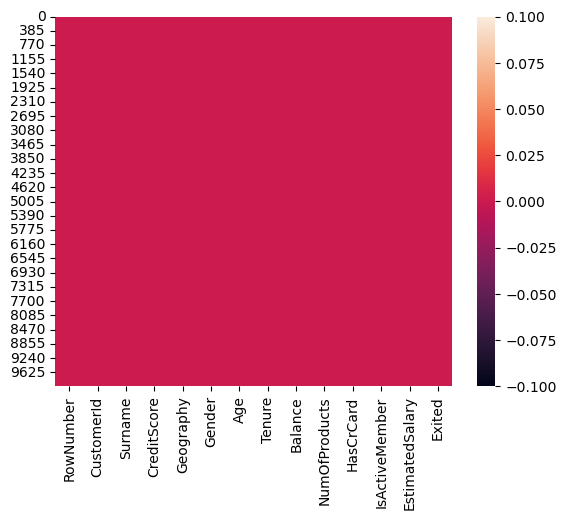

In [16]:
# Visual representation for checking presence of Null values
sns.heatmap(churn_data.isnull())

In [17]:
# Statistical summary of numerical columns
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
# Statistical summary of categorical columns
churn_data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [19]:
# Checking for duplicate records
churn_data[churn_data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [20]:
# Check target variable distribution
churn_data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
# Unique values in each categorical variable:
print("Surname unique:",churn_data["Surname"].nunique())
print("Geography unique:",churn_data["Geography"].nunique())
print("Gender unique:",churn_data["Gender"].nunique())

Surname unique: 2932
Geography unique: 3
Gender unique: 2


In [22]:
# Droping unnecessary columns like the RowNumber, CustomerId, and Surname since they are id of customers
churn_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [23]:
# Checking if the columns were deleted
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
# Value counts of male and female in the dataset
churn_data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [25]:
# Value counts of the 3 countries in the dataset
churn_data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [26]:
# Value counts of the customers that have exited
churn_data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [29]:
# Value counts of the customers that have exited in precentage
churn_data.Exited.value_counts()/len(churn_data) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

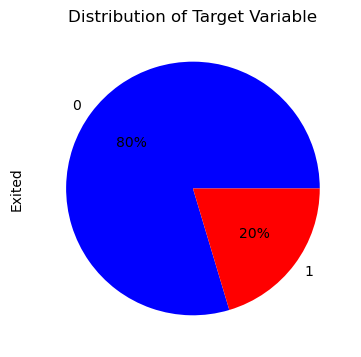

In [30]:
# Visual representation of Value counts of the customers that have exited in precentage using Pie Plot.
fig = plt.figure(figsize=(9,6))
plt.subplot(121)
churn_data['Exited'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['blue','red'])
plt.title("Distribution of Target Variable")
plt.show()

In [31]:
# Checking for redundant columns using standard deveation
churn_data.std()

CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

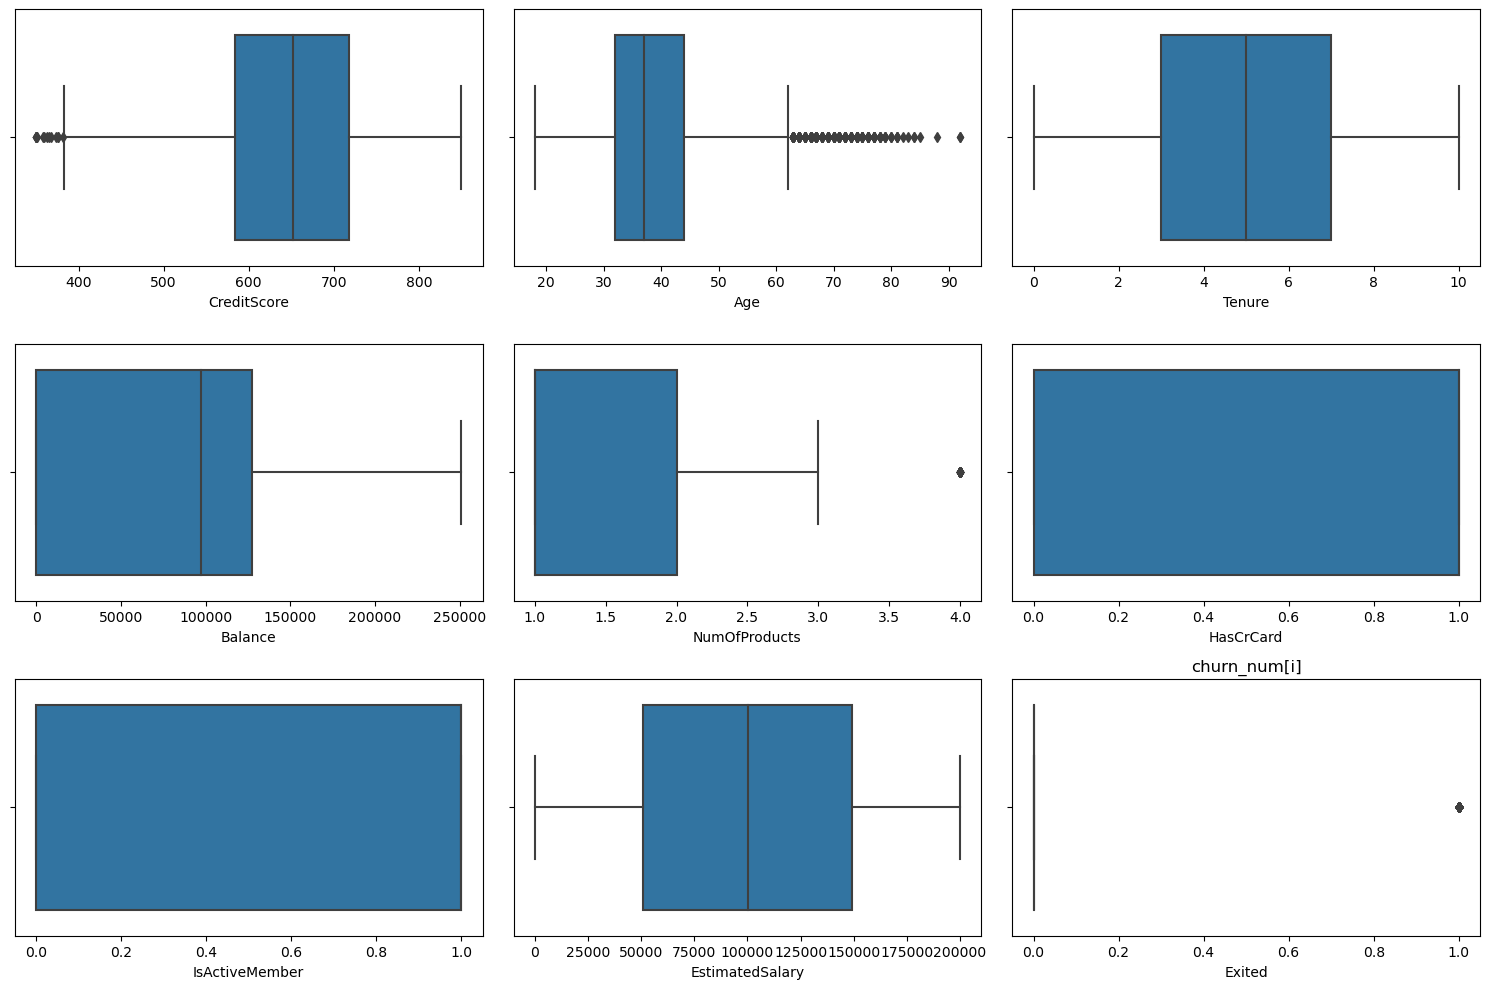

In [32]:
# Checking presence of Outliers

churn_num = churn_data.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,3,figsize=(15,10))

for i,subplots in zip(churn_num ,ax.flatten()):
    sns.boxplot(churn_num[i],ax=subplots)
    plt.title('churn_num[i]')
plt.tight_layout()

#There are outliers present in the data, but we will not treat it as we do not want the loss of data, so, we will keep it as it is and do the further analysis.

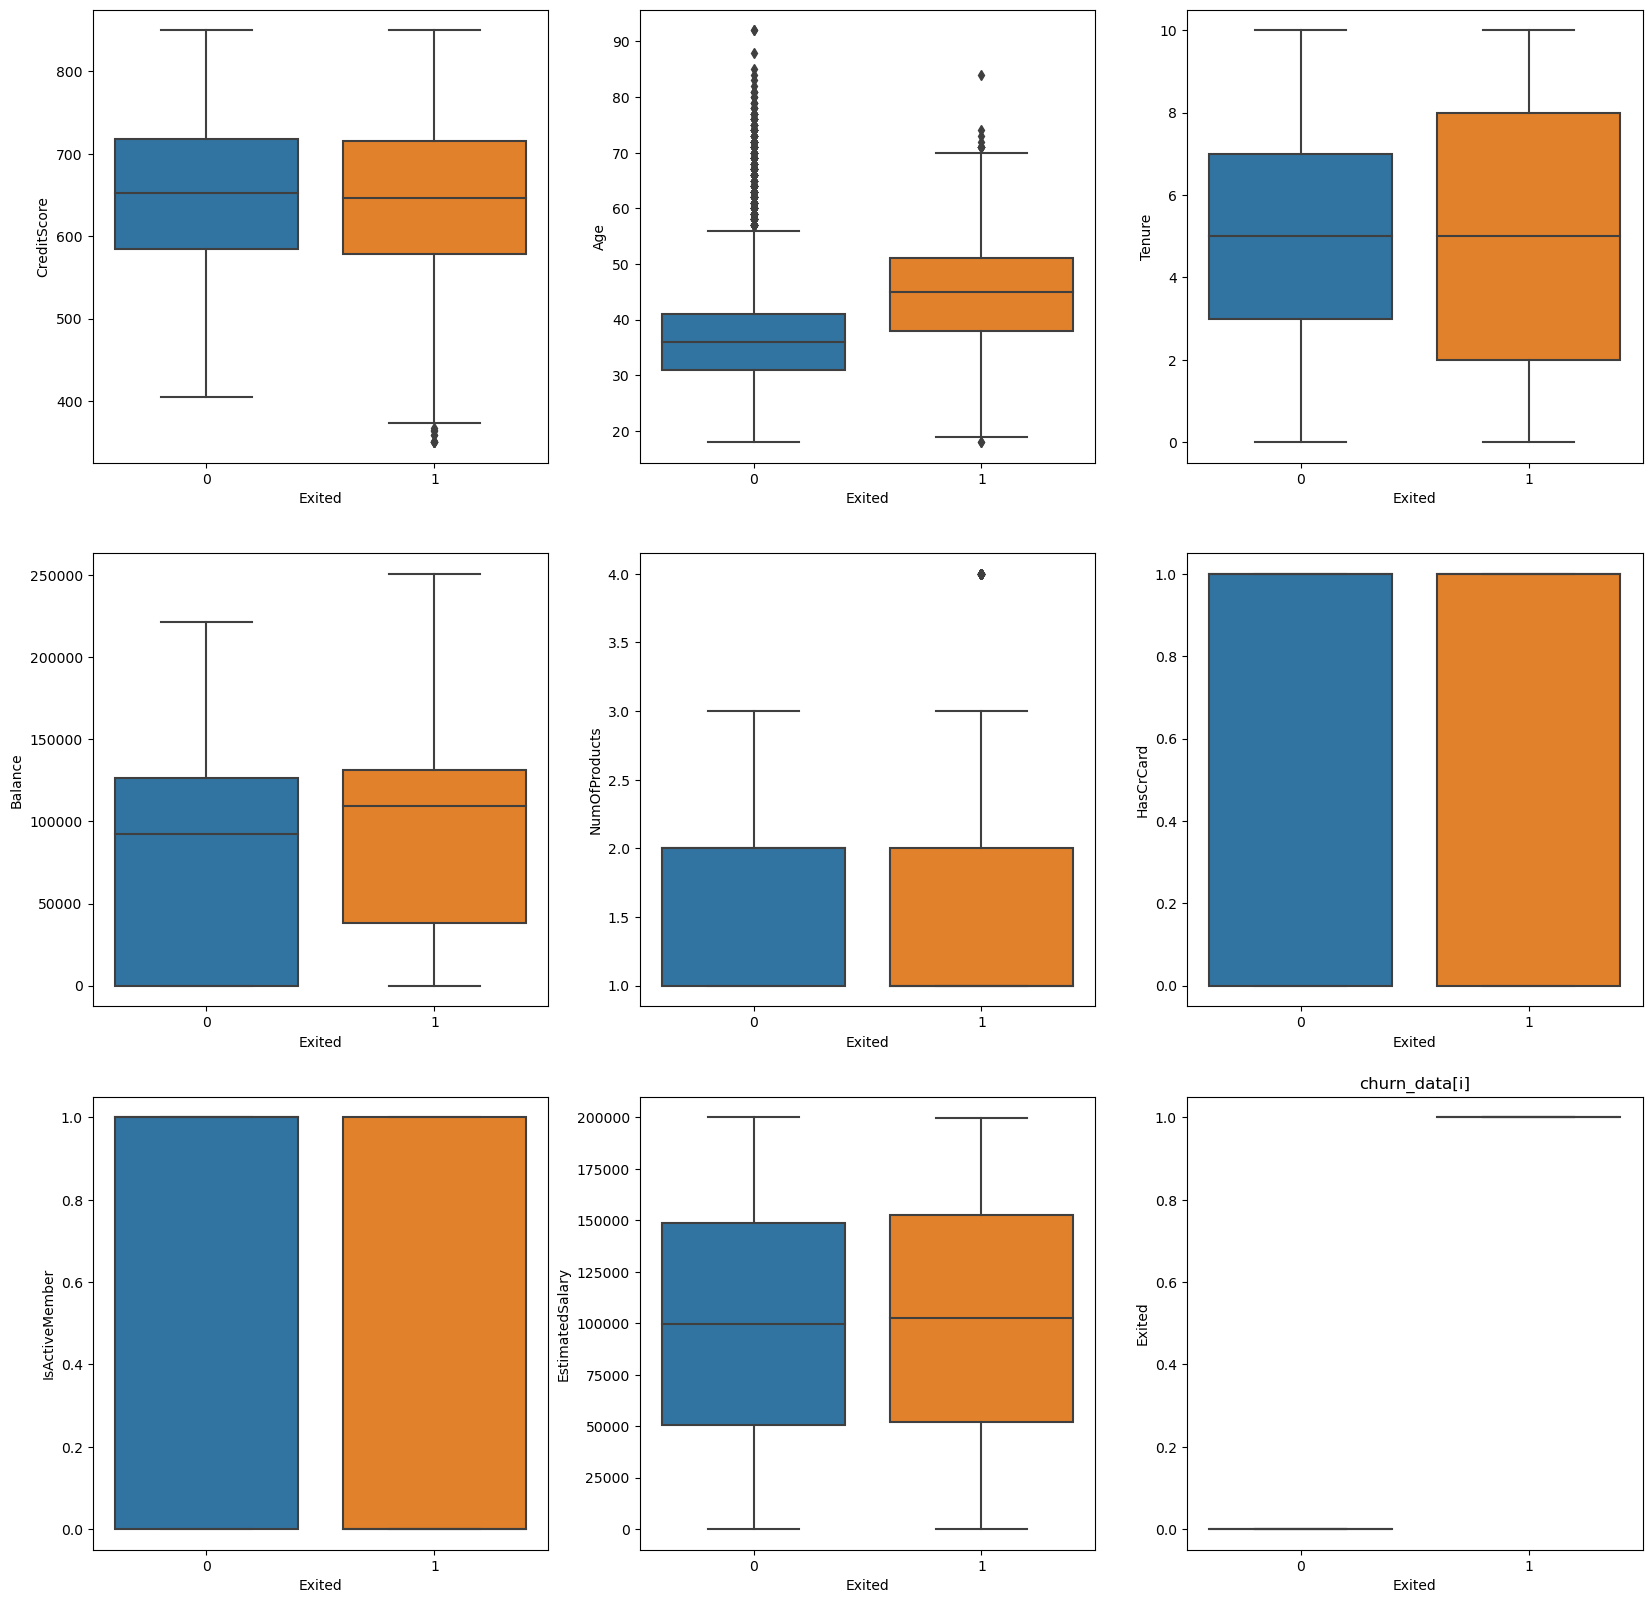

In [33]:
# Checking each feature's impact on Target variable.
cols = list(churn_data.select_dtypes(include=np.number).columns)

fig, ax = plt.subplots(3,3, figsize=(20,20))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(churn_data['Exited'], churn_data[i], ax=subplot)
    plt.title('churn_data[i]')
    
plt.show()

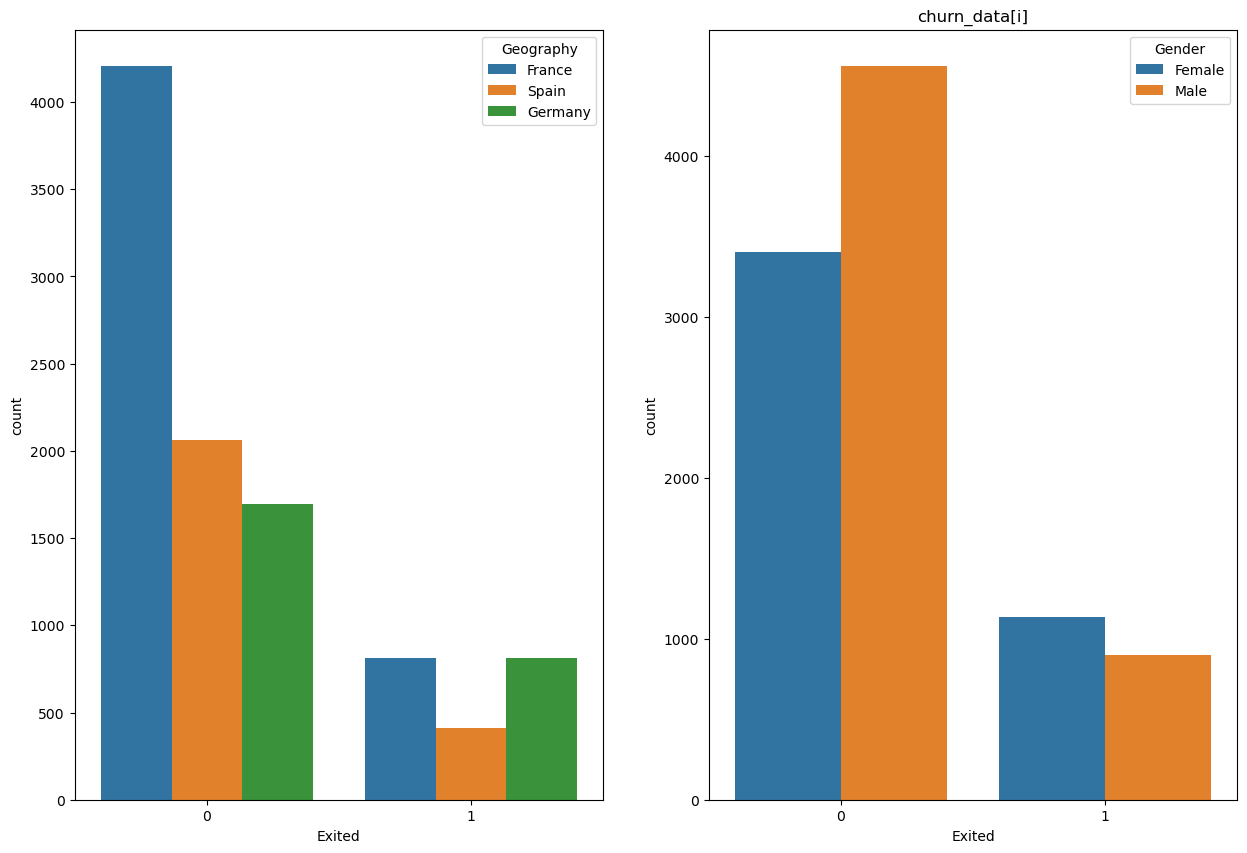

In [34]:
churn_cat = list(churn_data.select_dtypes(include='object').columns)

fig, ax = plt.subplots (1,2, figsize=(15,10))

for i, subplot in zip (churn_cat, ax.flatten()):
    sns.countplot(x = churn_data['Exited'], hue=churn_data[i], ax=subplot)
    plt.title('churn_data[i]')
    
plt.show()

In [35]:
# Sums of those exited by geography and gender
churn_data.groupby(['Geography', 'Gender'])[['Exited']].sum()

Exited
Geography Gender        
France    Female     460
          Male       350
Germany   Female     448
          Male       366
Spain     Female     231
          Male       182

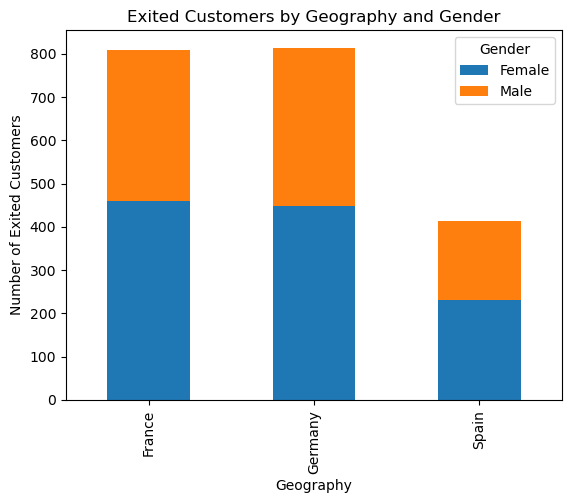

In [36]:
# Assuming your DataFrame is named churn_data
result = churn_data.groupby(['Geography', 'Gender'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Create a pivot table for visualization
pivot_table = result_df.pivot_table(index='Geography', columns='Gender', values='Exited', fill_value=0)

# Plot the data
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Geography')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Geography and Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()


In [37]:
# Majority of those exited only had a single product before leaving
churn_data.groupby(['NumOfProducts'])[['Exited']].sum()

,Exited
NumOfProducts,
1,1409
2,348
3,220
4,60


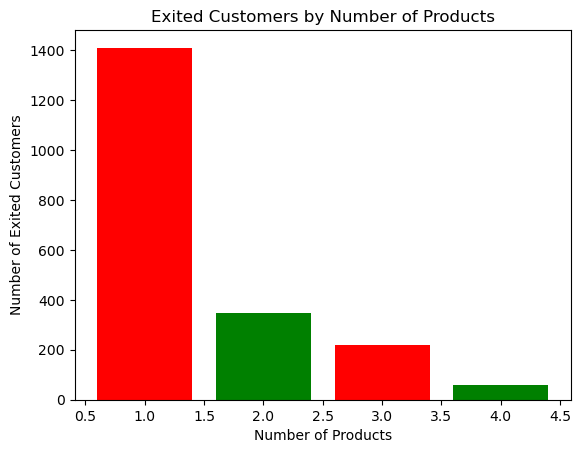

In [38]:
result = churn_data.groupby(['NumOfProducts'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Define custom colors for the bars (e.g., red for inactive members and green for active members)
colors = ['red', 'green']

# Plot the data
plt.bar(result_df['NumOfProducts'], result_df['Exited'], color=colors)
plt.xlabel('Number of Products')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Number of Products')
plt.show()


In [39]:
churn_data.groupby(['Gender'])[['Exited']].sum()

,Exited
Gender,
Female,1139
Male,898


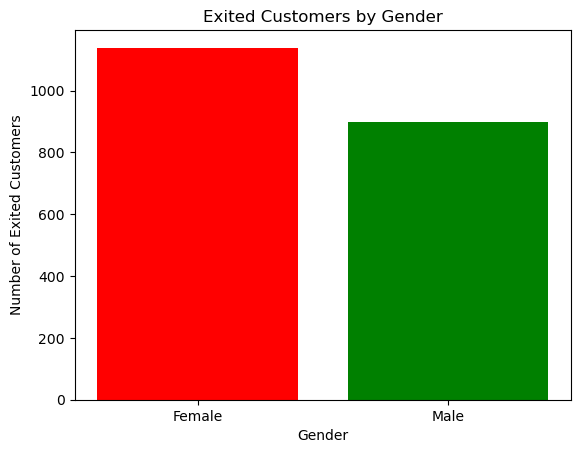

In [40]:
result = churn_data.groupby(['Gender'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Plot the data
plt.bar(result_df['Gender'], result_df['Exited'], color=colors)
plt.xlabel('Gender')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Gender')
plt.show()

In [41]:
churn_data.groupby(['Tenure'])[['Exited']].sum()

,Exited
Tenure,
0,95
1,232
2,201
3,213
4,203
5,209
6,196
7,177
8,197


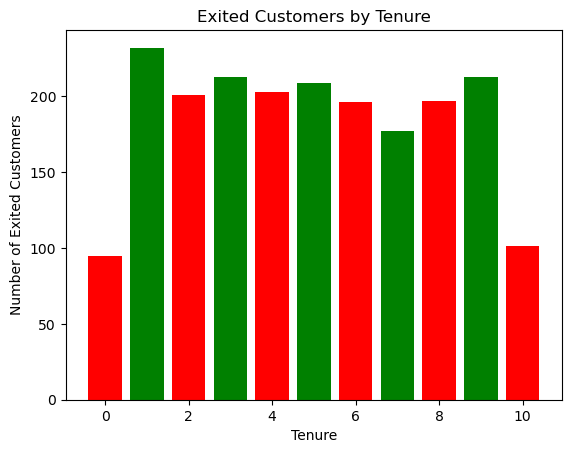

In [42]:
result = churn_data.groupby(['Tenure'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Plot the data
plt.bar(result_df['Tenure'], result_df['Exited'], color=colors)
plt.xlabel('Tenure')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Tenure')
plt.show()


In [43]:
churn_data.groupby(['HasCrCard'])[['Exited']].sum()

,Exited
HasCrCard,
0,613
1,1424


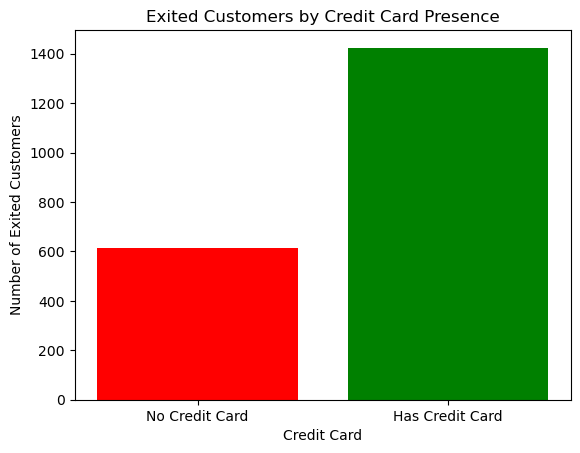

In [44]:
result = churn_data.groupby(['HasCrCard'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Plot the data
plt.bar(result_df['HasCrCard'], result_df['Exited'], color=colors)
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.xlabel('Credit Card')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Credit Card Presence')
plt.show()

In [45]:
churn_data.groupby(['IsActiveMember'])[['Exited']].sum()

,Exited
IsActiveMember,
0,1302
1,735


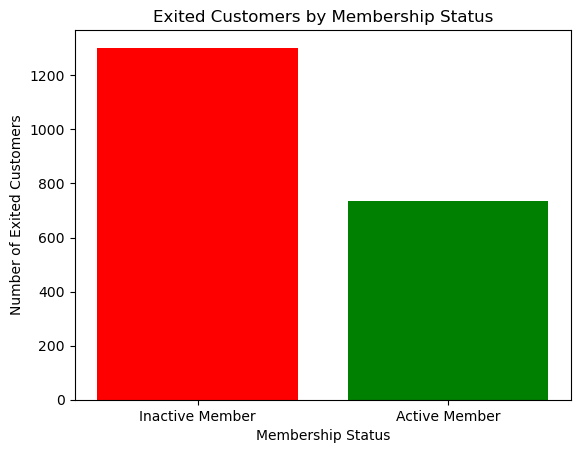

In [46]:
result = churn_data.groupby(['IsActiveMember'])[['Exited']].sum()

# Convert the result to a DataFrame for better plotting
result_df = result.reset_index()

# Plot the data with custom colors
plt.bar(result_df['IsActiveMember'], result_df['Exited'], color=colors)

# Set the x-axis labels
plt.xticks([0, 1], ['Inactive Member', 'Active Member'])

# Set axis labels and title
plt.xlabel('Membership Status')
plt.ylabel('Number of Exited Customers')
plt.title('Exited Customers by Membership Status')

# Show the plot
plt.show()


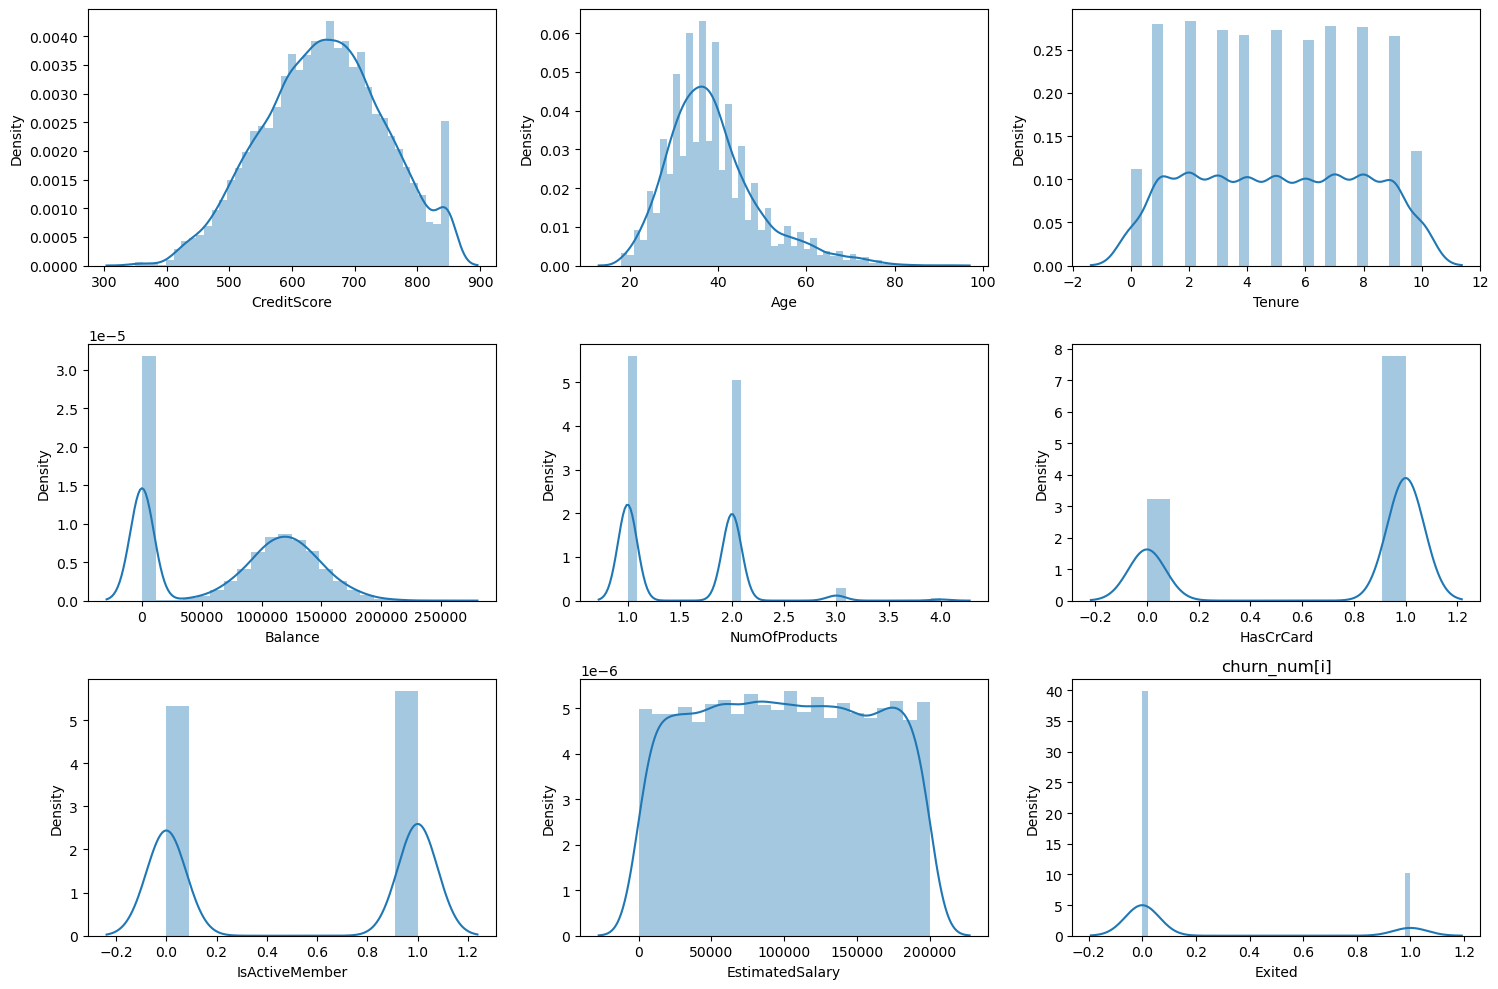

In [47]:
# Ploting histogram of numeric Columns for distribution of the data

churn_num = churn_data.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,3,figsize=(15,10))
for i ,subplots in zip(churn_num ,ax.flatten()):
    sns.distplot(churn_num[i],ax=subplots)
    plt.title('churn_num[i]')
plt.tight_layout()

# Columns other than 'age' have right skewness. Skewness should be treated in order to get reliable results from statistical
# tests and model building

In [48]:
# Checking skewness
churn_num.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [49]:
# Grouping the data by exited. The value 1 = exited
group_data = churn_data.groupby('Exited')

# Mean values of those customers that left and those who stayed
# Deleting the categorical columns and 'RowNumber', 'CustomerId'
group_data[['CreditScore','Age', 'Tenure', 'EstimatedSalary','NumOfProducts',
     'NumOfProducts','Balance','HasCrCard','IsActiveMember']].mean()

,CreditScore,Age,Tenure,EstimatedSalary,NumOfProducts,NumOfProducts,Balance,HasCrCard,IsActiveMember
Exited,,,,,,,,,
0,651.853196,37.408389,5.033279,99738.391772,1.544267,1.544267,72745.296779,0.707146,0.554565
1,645.351497,44.837997,4.932744,101465.677531,1.475209,1.475209,91108.539337,0.699067,0.360825


In [50]:
#mean ages of those exited per country
churn_data.pivot_table('Age', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,37.235966,45.133333
Germany,37.311504,44.894349
Spain,37.839147,44.147700


# Encoding

In [51]:
churn_data['Geography'].fillna(churn_data['Geography'].mode()[0], inplace=True)
churn_data['Age'].fillna(churn_data['Age'].mean(), inplace=True)
churn_data['HasCrCard'].fillna(churn_data['HasCrCard'].mode()[0], inplace=True)
churn_data['IsActiveMember'].fillna(churn_data['IsActiveMember'].mode()[0], inplace=True)

In [52]:
churn_encoded = pd.get_dummies(churn_data, columns=['Geography', 'Gender'])
print(churn_encoded.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 

# Observations:

Mean Age: The mean age of customers who exited the company is approximately 45, which is higher compared to the mean age of staying customers, which is around 37.

Gender Differences: A higher percentage of females, approximately 25%, have exited the company compared to males, where the exit rate is around 16%.

Churn by Country: Among the three countries (France, Spain, and Germany), Germany has the highest churn rate, with approximately 32% of customers leaving. In contrast, both France and Spain have similar churn rates of around 16%.

Product Usage: The majority of customers who decided to leave the company had only tried a single product.

# Train Test Split

In [53]:
X=churn_encoded.drop(['Exited'],axis=1)
y=churn_encoded['Exited']
from sklearn.model_selection import train_test_split  #Importing train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.5,random_state=10)

In [54]:
print('X_train shape:', xtrain.shape)
print('X_test shape:', xtest.shape)
print('y_train shape:', ytrain.shape)
print('y_test shape:', ytest.shape)

X_train shape: (5000, 13)
X_test shape: (5000, 13)
y_train shape: (5000,)
y_test shape: (5000,)


In [55]:
ytrain.value_counts()

0    3997
1    1003
Name: Exited, dtype: int64

In [56]:
ytest.value_counts()

0    3966
1    1034
Name: Exited, dtype: int64

# Modeling techniques

# Model 1: Logistic Regression.

In [57]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression.
model1_lr=LogisticRegression()
model1_lr.fit(xtrain,ytrain)
model1_lr_pred=model1_lr.predict(xtest)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model1_lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3966
           1       0.37      0.05      0.09      1034

    accuracy                           0.79      5000
   macro avg       0.59      0.51      0.48      5000
weighted avg       0.71      0.79      0.72      5000



# Model 2: Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model2_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model2_rfc.fit(xtrain,ytrain)
model2_rfc_pred=model2_rfc.predict(xtest)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model2_rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3966
           1       0.76      0.45      0.57      1034

    accuracy                           0.86      5000
   macro avg       0.82      0.71      0.74      5000
weighted avg       0.85      0.86      0.84      5000



# Model 3: Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
model3_dt=DecisionTreeClassifier()
model3_dt.fit(xtrain,ytrain)
model3_dt_pred=model3_dt.predict(xtest)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest,model3_dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3966
           1       0.47      0.53      0.50      1034

    accuracy                           0.78      5000
   macro avg       0.67      0.69      0.68      5000
weighted avg       0.79      0.78      0.79      5000



#  Scaling and Transformation

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(xtrain)
xtrain_ss1 = ss.transform(xtrain)
xtest_ss1 = ss.transform(xtest)
xtrain_ss=pd.DataFrame(xtrain_ss1,columns=xtrain.columns)
xtest_ss=pd.DataFrame(xtest_ss1,columns=xtest.columns)

In [64]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')
pt.fit(xtrain_ss)
xtrain_pt1 = pt.transform(xtrain_ss)
xtest_pt1 = pt.transform(xtest_ss)
xtrain_pt=pd.DataFrame(xtrain_pt1,columns=xtrain.columns)
xtest_pt=pd.DataFrame(xtest_pt1,columns=xtest.columns)

# Model 4: Decision Tree Classifier after Scaling and Transformation


In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_ss=DecisionTreeClassifier()
dt_ss.fit(xtrain_pt,ytrain)
dt_ss_pred=dt_ss.predict(xtest_pt)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,dt_ss_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3966
           1       0.47      0.51      0.49      1034

    accuracy                           0.78      5000
   macro avg       0.67      0.68      0.67      5000
weighted avg       0.79      0.78      0.78      5000



# Model 5: Random Forest Classifier after Scaling and Transformation

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_ss = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ss.fit(xtrain,ytrain)
rf_ss_pred=rf_ss.predict(xtest)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytest,rf_ss_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3966
           1       0.76      0.45      0.57      1034

    accuracy                           0.86      5000
   macro avg       0.82      0.71      0.74      5000
weighted avg       0.85      0.86      0.84      5000



# Model 6: Gradient Boosting Classifier after Scaling and Transformation

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_ss = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_ss.fit(xtrain,ytrain)
gbc_ss_pred = gbc_ss.predict(xtest)


In [70]:
from sklearn.metrics import classification_report
print(classification_report(ytest,gbc_ss_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      3966
           1       0.77      0.47      0.58      1034

    accuracy                           0.86      5000
   macro avg       0.82      0.71      0.75      5000
weighted avg       0.85      0.86      0.85      5000



# Model 7: Grid Search CV after Scaling and Transformation

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have the necessary imports and 'xtrain', 'ytrain', and 'xtest' defined

# Create the GradientBoostingClassifier with default hyperparameters
gbc = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters and their respective values you want to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data to find the best hyperparameters
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model on the test data
gbc_ss_pred = best_model.predict(xtest)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


In [72]:
from sklearn.metrics import classification_report
print(classification_report(ytest,gbc_ss_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3966
           1       0.77      0.44      0.56      1034

    accuracy                           0.86      5000
   macro avg       0.82      0.71      0.74      5000
weighted avg       0.85      0.86      0.84      5000



# Conclusions:

Based on the analysis of the plots, we can draw the following conclusions regarding the factors influencing churn classification:

Number of Products: The number of products a customer is using has a significant impact on churn potential. Both very low and very high numbers of products increase the likelihood of churn. Customers with a moderate number of products tend to have lower churn potential.

Gender: The gender of the customer appears to have a minor influence on churn classification. Female customers show slightly higher churn potential compared to male customers, and vice versa.

Age: Age is another important factor affecting churn potential. Younger customers and older customers are more likely to churn, while customers in middle-age tend to have a lower likelihood of churn.

For instance, a customer who is 25 years old and using two products has a higher probability of becoming a churn customer. The analysis indicates that focusing on customer segments with moderate product usage and age groups might help in reducing churn and retaining valuable customers.